In [11]:
#Decision Trees (DTs) 是一种用来 classification 和 regression 的无参监督学习方法。
#其目的是创建一种模型从数据特征中学习简单的决策规则来预测一个目标变量的值。


#分类树DecisionTreeClassifier，分类树的八个参数，一个属性，四个接口
# coding: utf-8

# In[1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


# In[4]:


wine = load_wine()


# In[11]:


wine.data#数据


# In[8]:


wine.target#标签


# In[10]:


import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)#表格展示


# In[13]:


wine.feature_names#特征的名字


# In[14]:


wine.target_names#标签分类


# In[15]:


Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)#数据是随机划分的


# In[16]:


Xtrain.shape


# In[17]:


Xtest.shape


# In[20]:


Ytrain.shape


# In[19]:


Ytest


# In[38]:


#建立模型
clf = tree.DecisionTreeClassifier(criterion="entropy"#criterion：不纯度的衡量指标
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                                  )#DecisionTreeClassifier具有随机性，clf = classfier，random_state，splitter控制随机性
clf = clf.fit(Xtrain,Ytrain)#clf实例化
score = clf.score(Xtest,Ytest)#返回预测的准确度accuracy


# In[39]:


score



# In[41]:


#import graphviz


# In[41]:


#import graphviz


# In[27]:


clf.feature_importances_#特征贡献度，重要属性



array([ 0.15887521,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.43274658,  0.        ,  0.        ,  0.02646884,
        0.06176816,  0.08557785,  0.23456336])

In [2]:
#树对训练集的拟合程度
#过拟合解释：在训练集上准确度很高，但在测试集上准确度不理想，二者差别很大
score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

In [12]:
#对决策树进行优化
#决策树优化算法的核心：剪枝策略
#下面是一些常用的剪枝参数
#参数 max_depth：适用于高维度低样本，建议从max_depth=3
#参数min_samples_leaf：一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本才被允许分枝，该参数太小就会过拟合
#建议从min_samples_leaf=5开始，对于类别不多的分类问题，min_samples_leaf=1是最佳选择
#参数min_samples_split，一个节点必须要包含至少min_samples_split个训练样本，这个节点才被允许分枝，否则分枝就不会发生

In [26]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                                  ,min_samples_leaf=1
                                  ,min_samples_split=5
                                  )#DecisionTreeClassifier具有随机性，clf = classfier，random_state，splitter控制随机性
clf = clf.fit(Xtrain,Ytrain)#clf实例化
score_train = clf.score(Xtrain,Ytrain)
score_train#训练集得分

0.97580645161290325

In [28]:
score_test = clf.score(Xtest,Ytest)#返回预测的准确度accuracy
score_test#测试集得分

0.94444444444444442

In [29]:
#max_features：限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃，和max_depth异曲同工。用来限制高维度数据过拟合。但该方法过于暴力，可能会导致模型
#学习不足，可以考虑使用PCA、ICA或者特征选择模块中的降为维算法
#min_impurity_decrease限制信息增益的大小，信息增益小于设定数值的分支不会发生。信息增益越大对决策树的贡献越大

In [31]:
#确定最优的剪枝参数：超参数学习曲线，是一条以超参数的取值为横坐标，模型的拟合度（比如score）为纵坐标的曲线，它用来衡量不同超参数取值下模型的表现的线
#在我们建好的决策树里，我们的模型度量指标就是score

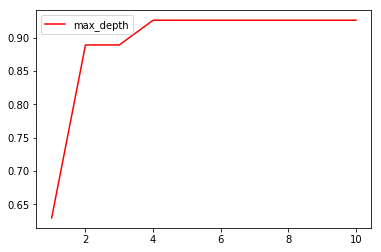

In [44]:
#引入可视化模块，演示max_depth这一参数对模型拟合度的影响
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i + 1#决策树的深度，范围为1-10
                                      ,criterion = "entropy"
                                      ,random_state = 20
                                      ,splitter = "random"
                                     )
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)#把score添加到曲线，纵坐标为score，即拟合程度，横坐标为决策树深度max_depth
plt.plot(range(1,11),test,color = "red",label = "max_depth")
plt.legend()
plt.show()

In [45]:
#目标权重参数
#class_weight&min_weight_fraction_leaf
#完成样本标签平衡的参数，模型会自动修正

In [47]:
#重要属性和接口
#重要属性
#属性是在模型训练之后，能够调用查看的模型的各种性质。对决策树来说最重要的就是feature_importances
#可以查看分类树属性列表，有feature_importances，max_features等

#重要接口
#sklearn中很多接口都是相似的，例如fit()和score()
#还有apply()和predict() apply()返回每个测试样本所在的叶子节点的索引 predict()返回每个测试样本的分类/回归结果
#要求所有接口的参数输入的特征矩阵都必须至少是二维矩阵，不能接受一维矩阵（即，只有一个样本，至少有两个样本）

In [48]:
#apply()返回每个测试样本所在的叶子节点的索
clf.apply(Xtest)#只需要特征X,不需要标签label

array([0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1,
       0, 2, 0, 0, 1, 2, 2, 1])

In [49]:
#predict()返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1,
       0, 2, 0, 0, 1, 2, 2, 1])